## 线性回归

In [1]:
import tensorflow as tf

/Users/hornsey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
x = tf.constant(3)
y = tf.constant(5)
z = tf.multiply(x,y)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(z))
sess.close()

15


In [14]:
import tensorflow as tf

x = tf.placeholder(tf.float32)
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))
y_ = tf.placeholder(tf.float32)
y = W*x + b

# 设置损失函数
lost = tf.reduce_mean(tf.square(y_ - y))
# 设置优化函数，使用梯度下降算法, 学习率为0.0000001
optimizer = tf.train.GradientDescentOptimizer(0.0001)
# 迭代目的：损失函数最小化
train_step = optimizer.minimize(lost)

# 启动会话
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# 迭代训练
steps = 100
for i in range(steps):
    xs = [i]
    ys = [5*i]
    feed = {x:xs, y_:ys}
    sess.run(train_step, feed_dict = feed)
    if i % 10 == 0:
        print("After %d iterations:" % i)
        print("W: %f" % sess.run(W))
        print("b: %f" % sess.run(b))
        print("lost: %f" % sess.run(lost, feed))   
    

After 0 iterations:
W: 0.000000
b: 0.000000
lost: 0.000000
After 10 iterations:
W: 0.372666
b: 0.053591
lost: 2136.265137
After 20 iterations:
W: 2.222769
b: 0.171819
lost: 3066.145996
After 30 iterations:
W: 4.320867
b: 0.256572
lost: 404.711060
After 40 iterations:
W: 4.957335
b: 0.275460
lost: 2.048153
After 50 iterations:
W: 4.994185
b: 0.276322
lost: 0.000208
After 60 iterations:
W: 4.995362
b: 0.276344
lost: 0.000004
After 70 iterations:
W: 4.996051
b: 0.276354
lost: 0.000000
After 80 iterations:
W: 4.996555
b: 0.276361
lost: 0.000001
After 90 iterations:
W: 4.996943
b: 0.276366
lost: 0.000002


## 非线性回归

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



/Users/hornsey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


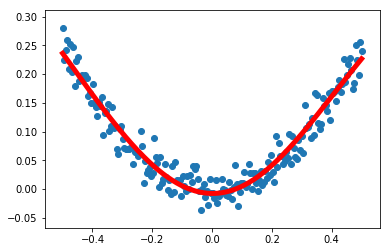

In [3]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

weights_l1 = tf.Variable(tf.random_normal([1, 10]))
biases_l1 = tf.Variable(tf.zeros([1,10]))
wx_plust_b_l1 = tf.matmul(x, weights_l1) + biases_l1
l1 = tf.nn.tanh(wx_plust_b_l1)

weights_l2 = tf.Variable(tf.random_normal([10, 1]))
biases_l2 = tf.Variable(tf.zeros([1,1]))
wx_plust_b_l2 = tf.matmul(l1, weights_l2) + biases_l2
prediction = tf.nn.tanh(wx_plust_b_l2)

loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for _ in range(20000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    prediction_value = sess.run(prediction, feed_dict={x: x_data})    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()

## sigmod函数

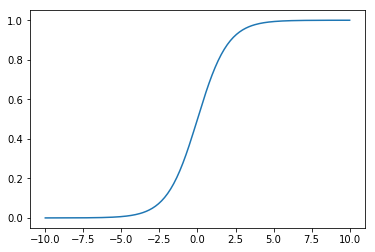

In [7]:
X = np.linspace(-10, 10, 200)
y = [1/(1+np.exp(-x)) for x in X]
plt.plot(x,y)

plt.show()

In [6]:
np.exp(3)

20.085536923187668

In [37]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[3]])
product = tf.matmul(matrix1, matrix2)

In [3]:
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[15]]


In [9]:
with tf.Session() as sess:
    result = sess.run([product])
    print(result)

[array([[15]], dtype=int32)]


In [42]:
with tf.Session() as sess:
  with tf.device("/gpu:1"):  #表示机器第二个GPU
    matrix1 = tf.constant([[3., 3.]])
    matrix2 = tf.constant([[2.],[2.]])
    product = tf.matmul(matrix1, matrix2)

    #print(sess.run([product]))

In [44]:
print(product)

Tensor("MatMul_6:0", shape=(1, 1), dtype=float32, device=/device:GPU:1)


In [12]:
sess = tf.InteractiveSession()
x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])
x.initializer.run()
sub = tf.subtract(x,a)
print(sub.eval)

<bound method Tensor.eval of <tf.Tensor 'Sub:0' shape=(2,) dtype=float32>>


In [19]:
print(sub.eval())

[-2. -1.]


In [18]:
a=tf.constant([2,3,4], shape=[2,3])
print(sess.run(a))

[[2 3 4]
 [4 4 4]]


In [21]:
state = tf.Variable(0, name='counter')
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3


## Fetch

In [23]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)

with tf.Session() as sess:
    result = sess.run([mul, intermed])
    print(result)
        

[21.0, 7.0]


## Feed

In [36]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([14.], dtype=float32)]


## 手写识别模型

In [45]:
import tensorflow as tf

x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder("float", [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y_))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    for _ in range(100):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))
        

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'Variable:0' shape=(2,) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(2,) dtype=float32_ref>", "<tf.Variable 'counter:0' shape=() dtype=int32_ref>", "<tf.Variable 'counter_1:0' shape=() dtype=int32_ref>", "<tf.Variable 'Variable_2:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>"] and loss Tensor("Neg:0", shape=(), dtype=float32).